# 1. Outliers

# 2. How Outliers will get introduced in the data or DataSets

# 3. Impact of Outliers

# 4. How to Detect Outliers 

# 5. Remove Outliers/How to reduce an impact of Outliers

# 6. Impact of Outliers on the ML Algorithms

### 6.1 Sensitive to Outliers

# 6.2 Not Sensitive to Outliers 

# 7. How to find out the Outliers from the Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
array1 = np.random.randint(20,40, size = 20)
array1

array([37, 30, 32, 38, 30, 21, 39, 26, 29, 32, 30, 26, 25, 29, 33, 35, 24,
       34, 38, 33])

In [3]:
array2 = np.array([26, 34, 211, 39, 31, 38, 35, 33, 36, 35, 28, 34, 24, 32, 220, 24, 35,
       31, 260, 34])
array2

array([ 26,  34, 211,  39,  31,  38,  35,  33,  36,  35,  28,  34,  24,
        32, 220,  24,  35,  31, 260,  34])

# Normality Assumption

<AxesSubplot: ylabel='Density'>

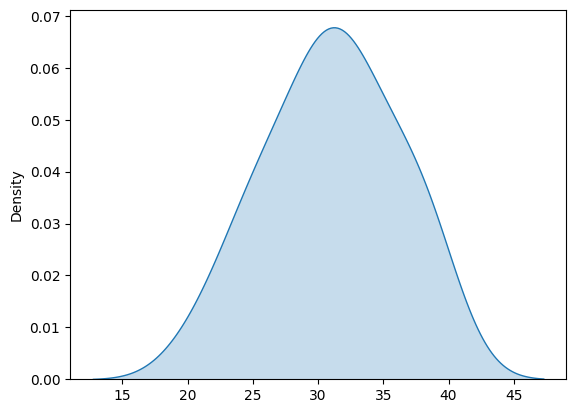

In [4]:
sns.kdeplot(array1, fill = True)

<AxesSubplot: ylabel='Density'>

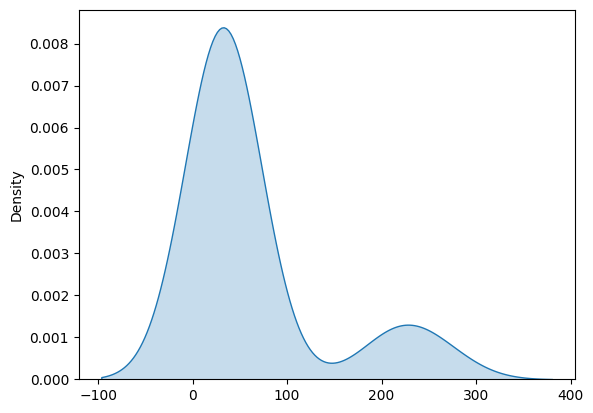

In [5]:
sns.kdeplot(array2, fill = True)

In [6]:
from scipy.stats import normaltest,shapiro

In [7]:
status,p_val = normaltest(array1)
p_val


if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not Normally DIstributed')

Data is normally distributed


In [8]:
status,p_val = normaltest(array2)
p_val


if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not Normally DIstributed')

Data is not Normally DIstributed


In [9]:
status,p_val = shapiro(array2)
p_val


if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not Normally DIstributed')

Data is not Normally DIstributed


In [10]:
status,p_val = shapiro(array1)
p_val


if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not Normally DIstributed')

Data is normally distributed


# 1. Z-Score Method

In [11]:
array1

array([37, 30, 32, 38, 30, 21, 39, 26, 29, 32, 30, 26, 25, 29, 33, 35, 24,
       34, 38, 33])

In [12]:
array2

array([ 26,  34, 211,  39,  31,  38,  35,  33,  36,  35,  28,  34,  24,
        32, 220,  24,  35,  31, 260,  34])

In [13]:
print(array1)
mean = np.mean(array1)
# mean = df['ColumnName'].mean()
std = np.std(array1)
print()
print('Mean of an array1 is :', mean)
print('Std of an array1 is :', std)

threshold = 3
outliers = []

for x_val in array1:
#     print(x_val)
    z_score = (x_val - mean)/std
#     print(x_val,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x_val)
        
print('Detected Outliers are :', outliers)

[37 30 32 38 30 21 39 26 29 32 30 26 25 29 33 35 24 34 38 33]

Mean of an array1 is : 31.05
Std of an array1 is : 4.893618293246828
Detected Outliers are : []


In [14]:
print(array2)
mean = np.mean(array2)
# mean = df['ColumnName'].mean()
std = np.std(array2)
print()
print('Mean of an array2 is :', mean)
print('Std of an array2 is :', std)

threshold = 1
outliers = []

for x_val in array2:
#     print(x_val)
    z_score = (x_val - mean)/std
#     print(x_val,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x_val)
        
print('Detected Outliers are :', outliers)


# Accuracy might be 80%
# Accuracy might be 82%

[ 26  34 211  39  31  38  35  33  36  35  28  34  24  32 220  24  35  31
 260  34]

Mean of an array2 is : 62.0
Std of an array2 is : 71.30638120112393
Detected Outliers are : [211, 220, 260]


In [15]:
array2

array([ 26,  34, 211,  39,  31,  38,  35,  33,  36,  35,  28,  34,  24,
        32, 220,  24,  35,  31, 260,  34])

In [16]:
array2 = np.array([ 26,  34, 211,  39,  31,  38,  35,  33,  36,  35,  28,  34,  24,
        32, -220,  24,  35,  31, 260,  34,100000])

mean = np.mean(array2)
# mean = df['ColumnName'].mean()
std = np.std(array2)
print()
print('Mean of an array2 is :', mean)
print('Std of an array2 is :', std)

threshold = 3
outliers = []

for x_val in array2:
#     print(x_val)
    z_score = (x_val - mean)/std
#     print(x_val,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x_val)
        
print('Detected Outliers are :', outliers)



Mean of an array2 is : 4800.0
Std of an array2 is : 21287.531083219765
Detected Outliers are : [100000]


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
array2

array([    26,     34,    211,     39,     31,     38,     35,     33,
           36,     35,     28,     34,     24,     32,   -220,     24,
           35,     31,    260,     34, 100000])

In [36]:
min_max = []

for i in array2:
    min_max_sc = ((i - np.min(array2)) / (np.max(array2) - np.min(array2)))
    min_max.append(min_max_sc)
    
print(min_max)

[0.0024545998802634203, 0.0025344242666134505, 0.0043005388146078625, 0.002584314508082219, 0.0025044901217321893, 0.0025743364597884655, 0.0025444023149072043, 0.0025244462183196966, 0.0025543803632009578, 0.0025444023149072043, 0.002474555976850928, 0.0025344242666134505, 0.002434643783675913, 0.0025144681700259427, 0.0, 0.002434643783675913, 0.0025444023149072043, 0.0025044901217321893, 0.004789463181001796, 0.0025344242666134505, 1.0]


In [48]:
min_max_mean = np.mean(min_max)
std_min_max = np.std(min_max)

threshold = 3
outliers = []

for x_val in min_max:
#     print(x_val)
    z_score = (x_val - min_max_mean)/std_min_max
#     print(x_val,z_score)
    if np.abs(z_score) > threshold:
        outliers.append(x_val)
        
print('Detected Outliers are :', outliers)


Detected Outliers are : [1.0]
